In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 读取训练集信息
data_train = pd.read_csv('train.csv')
print(data_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# 查看训练集概要信息
print(data_train.info())

# Age, Cabin, Embarked 存在missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
# 查看数值类型特征的统计信息
data_train.describe()

# 平均存货率38%，平均年龄 29

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 通过数据图查看特征与存货之间的关系

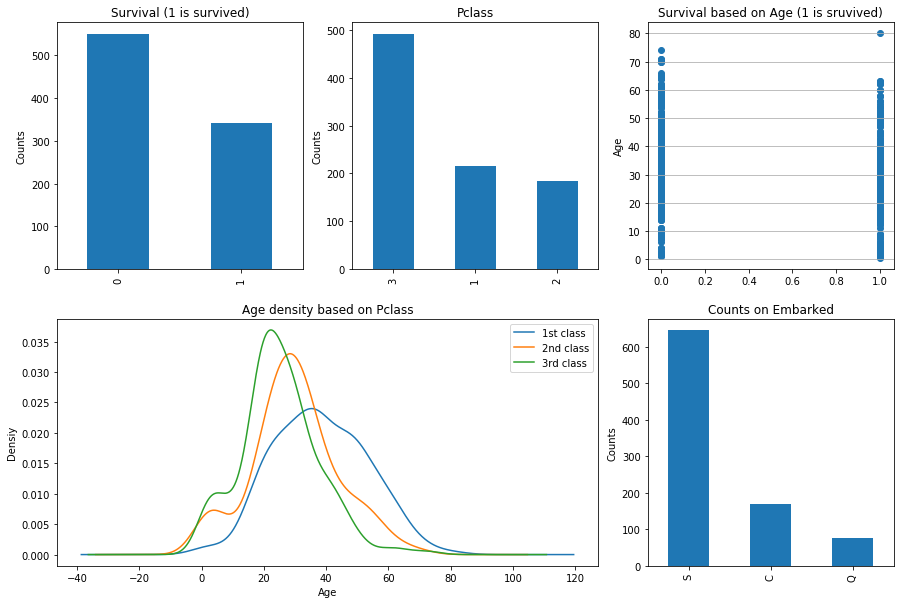

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.set(alpha = 0.2)

plt.subplot2grid((2, 3), (0, 0))
data_train.Survived.value_counts().plot(kind = 'bar') # 生成柱状图，统计存活的乘客数和遇难乘客数
plt.title('Survival (1 is survived)')
plt.ylabel('Counts')

plt.subplot2grid((2, 3), (0, 1))
data_train.Pclass.value_counts().plot(kind = 'bar') # 统计各个等级仓位的乘客数
plt.title('Pclass')
plt.ylabel('Counts')

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title('Survival based on Age (1 is sruvived)')

# 查看不同等级仓位乘客年龄的分布
plt.subplot2grid((2,3), (1,0), colspan=2)
data_train[data_train.Pclass == 1]['Age'].plot(kind='kde')
data_train[data_train.Pclass == 2]['Age'].plot(kind='kde')
data_train[data_train.Pclass == 3]['Age'].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Densiy')
plt.title('Age density based on Pclass')
plt.legend(('1st class', '2nd class', '3rd class'), loc='best')

# 查看Embarked统计情况
plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('Counts on Embarked')
plt.ylabel('Counts')
plt.show()

3    372
2     97
1     80
Name: Pclass, dtype: int64


Text(0, 0.5, 'Counts')

<Figure size 432x288 with 0 Axes>

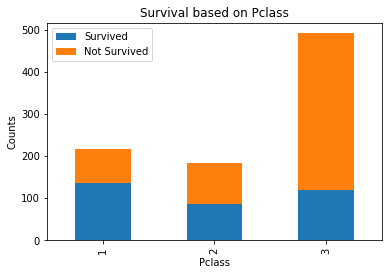

In [7]:
# 查看仓位等级与存活的关系
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_0 = data_train[data_train['Survived']==0]['Pclass'].value_counts()
Survived_1 = data_train[data_train['Survived']==1]['Pclass'].value_counts()

print(Survived_0)

df = pd.DataFrame({'Survived': Survived_1, 'Not Survived': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Survival based on Pclass')
plt.xlabel('Pclass')
plt.ylabel('Counts')

In [8]:
# 3等舱的存活率明显比1,2低，因此仓位等级也可以纳入特征中

<Figure size 432x288 with 0 Axes>

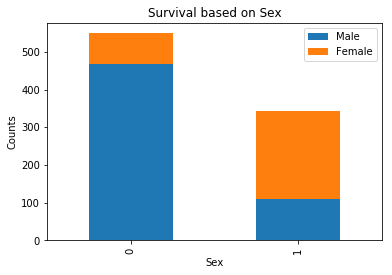

In [9]:
# 查看性别与存活的关系
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_m = data_train[data_train['Sex'] == 'male']['Survived'].value_counts()
Survived_f = data_train[data_train['Sex'] == 'female']['Survived'].value_counts()

df = pd.DataFrame({'Male': Survived_m, 'Female': Survived_f})
df.plot(kind='bar', stacked=True)
plt.title('Survival based on Sex')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

In [10]:
# 性别和存活之间的关系还是很大的。女性存活率明显比男性要高。 性别纳入特征中

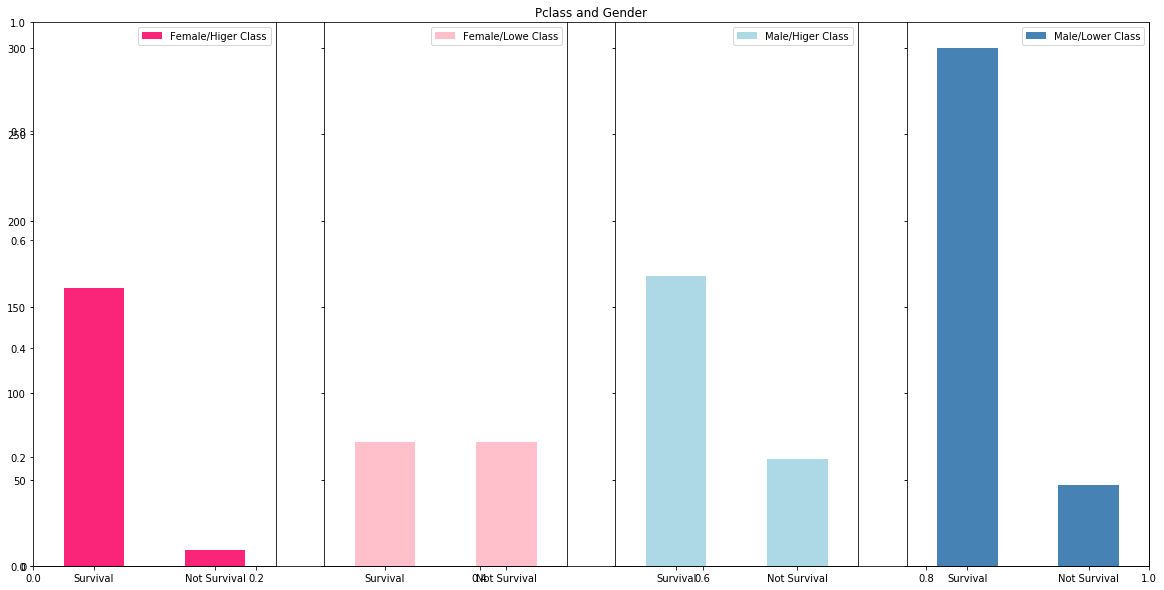

In [11]:
# 查看各仓位各性别的存活情况
fig = plt.figure(figsize=(20,10))
fig.set(alpha = 0.65)
plt.title('Pclass and Gender')

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(['Survival', 'Not Survival'], rotation=0)
ax1.legend(["Female/Higer Class"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(['Survival', 'Not Survival'], rotation=0)
plt.legend(["Female/Lowe Class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(['Survival', 'Not Survival'], rotation=0)
plt.legend(["Male/Higer Class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(['Survival', 'Not Survival'], rotation=0)
plt.legend(["Male/Lower Class"], loc='best')

plt.show()


Text(0, 0.5, 'Counts')

<Figure size 1440x720 with 0 Axes>

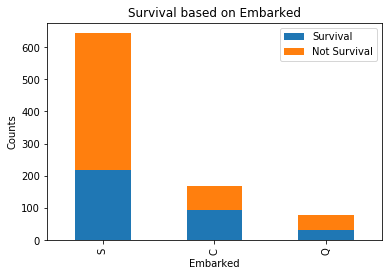

In [12]:
# 查看Embarked和Survival的关系
fig = plt.figure(figsize=(20,10))
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived==0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived==1].value_counts()

df=pd.DataFrame({'Survival': Survived_1, 'Not Survival': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Survival based on Embarked')
plt.xlabel('Embarked')
plt.ylabel('Counts')

In [13]:
# 查看兄弟/姐妹， 孩子/父母 数量对存活的影响
g = data_train.groupby(['SibSp', 'Survived'])
# print(g.info())
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [14]:
# ticket是唯一的，所以不纳入特征考虑范围
# 查看cabin和存活的关系
print(data_train['Cabin'].value_counts())

G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
E101               3
F2                 3
D                  3
F33                3
C78                2
B49                2
B51 B53 B55        2
E121               2
E24                2
B57 B59 B63 B66    2
C65                2
B18                2
C83                2
D33                2
B77                2
C126               2
D17                2
C68                2
C93                2
D20                2
B58 B60            2
B22                2
F G73              2
E8                 2
E67                2
B35                2
                  ..
C70                1
C148               1
C104               1
C54                1
C91                1
E12                1
C103               1
A26                1
C45                1
A19                1
C86                1
B78                1
B37                1
C47                1
A14                1
E46                1
D48          

<Figure size 720x360 with 0 Axes>

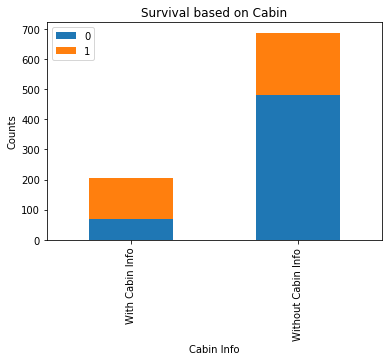

In [15]:
# 在粗粒度上查看cabin和存活的关系(即有冇cabin信息)
fig = plt.figure(figsize=(10,5))
fig.set(alpha=0.2)

Survived_cabin = data_train[pd.notnull(data_train['Cabin'])]['Survived'].value_counts()
Survived_nocabin = data_train[pd.isnull(data_train['Cabin'])]['Survived'].value_counts()

df=pd.DataFrame({'With Cabin Info': Survived_cabin, 'Without Cabin Info': Survived_nocabin}).transpose()

df.plot(kind='bar', stacked=True)

plt.title('Survival based on Cabin')
plt.xlabel('Cabin Info')
plt.ylabel('Counts')
plt.show()

In [16]:
# 到此为止，确定使用的特征有 Age, Fare, Parch, SibSp, Pclass

In [17]:
# age中的缺失值过多，但是Age是一个很重要的特征，不能舍弃。有两种方法填补缺失值
# 1.将连续特征离散化。即分成几个区间变成类目特征。缺失的值作为一个新的类型。
# 2.使用已有的值拟合数据

In [18]:
# 尝试使用random forest拟合数据
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # 根据是否有年龄数据将Train data分成两类
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y是目标年龄
    y = known_age[:, 0]
    
    # 其他特征
    X = known_age[:, 1:]
    
#     print(y)
#     print(X)
    
    # 训练模型
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs= -1)
    rfr.fit(X, y)
    
    # 预测结果
    predictAges = rfr.predict(unknown_age[:, 1:])

    # 用预测的结果填充缺失值
    df.loc[(df.Age.isnull(), 'Age')] = predictAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[df['Cabin'].notnull(), 'Cabin'] = 'Yes'
    df.loc[df['Cabin'].isnull(), 'Cabin'] = 'No'
    
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [19]:
print(data_train.info())
print(data_train.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heik

In [20]:
# 对Cabin属性进行因子化
# 即新建Cabin_yes和Cabin_no两个属性，若cabin属性为YES，则cabin_yes为1，cabin_no为0.

In [21]:
# 使用pandas的get_dummies来完成
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix = 'Pclass')

# 拼接到原来的data frame上
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis = 1)

# 抛弃原来的一些属性
df.drop(['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
print(df)

     PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
5              6         0                                   Moran, Mr. James   
6              7         0                            McCarthy, Mr. Timothy J   
7              8         0                     Palsson, Master. Gosta Leonard   
8              9         1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10         1                Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1                    Sandstrom, Miss. Marguerite Rut   
11            12         1  

In [22]:
# 注意到Age和Fare的变化范围太大了，会造成收敛过慢的问题。 因此要对这两个属性进行scaling
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

# fit(self, X[, y])

# Compute the mean and std to be used for later scaling.

# fit_transform(self, X[, y])

# Fit to data, then transform it.


# print(df['Age'].to_numpy().reshape)

age_scale_param = scaler.fit(df['Age'].to_numpy().reshape(-1,1))
# # print(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'].to_numpy().reshape(-1,1), age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].to_numpy().reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].to_numpy().reshape(-1,1), fare_scale_param)

In [23]:
# print(df)

In [24]:
# 使用逻辑回归建模

from sklearn import linear_model

# 用正则取出需要的属性
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*')
# 将dataframe 转换成 矩阵
train_np = train_df.as_matrix()

# label
y = train_np[:,0]

# features
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C = 1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

In [25]:
# 处理test_data

data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()

X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

age_scale_param = scaler.fit(data_test['Age'].to_numpy().reshape(-1,1))
fare_scale_param = scaler.fit(data_test['Fare'].to_numpy().reshape(-1,1))

df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].to_numpy().reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].to_numpy().reshape(-1,1), fare_scale_param)
df_test


,PassengerId,Name,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,"Kelly, Mr. James",34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,"Myles, Mr. Thomas Francis",62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,"Wirz, Mr. Albert",27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,"Svensson, Mr. Johan Cervin",14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,"Connolly, Miss. Kate",30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,"Caldwell, Mr. Albert Francis",26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,"Davies, Mr. John Samuel",21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [26]:
# 做预测
test = df_test.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)


In [27]:
# 通过逻辑回归得到的score只有0.75，需要继续优化

In [28]:
# 首先，年龄通过其余属性来预测可能并不准确，并不態照顾到老年乘客和年幼乘客。因此，可以将年龄离散化，按区段分类别属性更合适。

In [29]:
# 把得到的model系数和feature关联起来看看
pd.DataFrame({'columns': list(train_df.columns)[1:], 'coef': list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3772658733063072]
1,Parch,[-0.10138841585905806]
2,Sex_female,[1.7116363856199095]
3,Sex_male,[-0.9778550169761014]
4,Pclass_1,[1.085466805706939]
5,Pclass_2,[0.0]
6,Pclass_3,[-1.1488552794286886]
7,Age_scaled,[-0.5409182067307282]
8,Fare_scaled,[0.1277138239273694]


In [30]:
# 不可能每调整一次模型就提交一次评价模型，可以使用cross valiation将训练集分成两部分，一部分用于训练，另一部分用于预测
from sklearn.model_selection import cross_validate

# 查看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:, 1:]
y = all_data.as_matrix()[:, 0]
print(cross_validate(clf, X, y, cv=5))

{'fit_time': array([0.00199413, 0.00199461, 0.00199437, 0.00199604, 0.00099611]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.77653631, 0.80446927, 0.7752809 , 0.78651685, 0.81355932]), 'train_score': array([0.80337079, 0.81179775, 0.80364656, 0.80364656, 0.80252101])}


In [31]:
from sklearn.model_selection import train_test_split
split_train, split_val = train_test_split(df, test_size = 0.3, random_state = 0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*')

# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:, 1:], train_df.as_matrix()[:,0])

# 对验证集进行预测
cv_df = split_val.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:, 1:])


# 查看哪些sample是预测错误的
origin_data_train = pd.read_csv('train.csv')
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_val[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
print(bad_cases)

     PassengerId  Survived  Pclass  \
14            15         0       3   
18            19         0       3   
49            50         0       3   
55            56         1       1   
65            66         1       3   
68            69         1       3   
85            86         1       3   
113          114         0       3   
140          141         0       3   
193          194         1       2   
204          205         1       3   
240          241         0       3   
251          252         0       3   
261          262         1       3   
264          265         0       3   
267          268         1       3   
271          272         1       3   
279          280         1       3   
283          284         1       3   
293          294         0       3   
298          299         1       1   
301          302         1       3   
312          313         0       2   
338          339         1       3   
390          391         1       1   
402         

In [32]:
# 可以在此基础上再挖掘某些特征，比如年龄离散化

In [33]:
print(df.columns)
print(df.head())
print(df.info())

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin_No', 'Cabin_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Age_scaled', 'Fare_scaled'],
      dtype='object')
   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch     Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  \
0  22.0      1      0   7.2500         1          0           0           0   
1  38.0      1      0  71.2833         0          1           1           0   
2  26.0    

In [34]:
# 对年龄实现离散化
df['CategoricalAge'] = pd.cut(df['Age'], 5) # 将年龄分成五组
# print(df['CategoricalAge'])
    # Mapping Age
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']  

# 若年龄<16的话，新建一个child特征，并置为1
df.loc[df['CategoricalAge'] == 0, 'IsChild'] = 1
df.loc[df['CategoricalAge'] != 0, 'IsChild'] = 0

In [35]:
# 添加Family size 特征
df['FamilySize'] = df['SibSp'] + df['Parch']

In [36]:
# print(df['FamilySize'])

In [37]:
# 提取称谓
import re as re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name) # 正则表达式提取称谓
#     print(title_search)
    # If the title exists, extract and return it.
    if title_search:

        return title_search.group(1)
    return ""

df['Title'] = df['Name'].apply(get_title)

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [38]:


# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} # 将称谓转换成类目变量
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [39]:
# print(df.columns)

train_df = df.filter(regex='Survived|Age|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*|Fare_scaled|IsChild|FamilySize|Title')
train_df.drop(['Age_scaled', 'CategoricalAge'], axis=1, inplace=True)
print(train_df.columns)
print(train_df.info())

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Fare_scaled', 'IsChild',
       'FamilySize', 'Title'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Fare_scaled    891 non-null float64
IsChild        891 non-null float64
FamilySize     891 non-null int64
Title          891 non-null int64
dtypes: float64(3), int64(5), uint8(5)
memory usage: 60.1 KB
None


In [40]:
# 训练模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:, 1:], train_df.as_matrix()[:,0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

In [41]:
# 处理test数据

df_test['CategoricalAge'] = pd.cut(df_test['Age'], 5) # 将年龄分成五组
# print(df['CategoricalAge'])
    # Mapping Age
df_test.loc[ df_test['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 32), 'Age'] = 1
df_test.loc[(df_test['Age'] > 32) & (df_test['Age'] <= 48), 'Age'] = 2
df_test.loc[(df_test['Age'] > 48) & (df_test['Age'] <= 64), 'Age'] = 3
df_test.loc[ df_test['Age'] > 64, 'Age']  

# 若年龄<16的话，新建一个child特征，并置为1
df_test.loc[df_test['CategoricalAge'] == 0, 'IsChild'] = 1
df_test.loc[df_test['CategoricalAge'] != 0, 'IsChild'] = 0

# 添加Family size 特征
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

# 处理称谓
df_test['Title'] = df_test['Name'].apply(get_title)

df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} # 将称谓转换成类目变量
df_test['Title'] = df_test['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].fillna(0)

test_df = df_test.filter(regex='Survived|Age|SibSp|Parch|Fare_.*|Cabin_.*Emmarked_.*|Sex_.*|Pclass_.*|Fare_scaled|IsChild|FamilySize|Title')
test_df.drop(['Age_scaled', 'CategoricalAge'], axis=1, inplace=True)

print(test_df.columns)
print(test_df.info())

Index(['Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Fare_scaled', 'IsChild', 'FamilySize',
       'Title'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Fare_scaled    418 non-null float64
IsChild        418 non-null float64
FamilySize     418 non-null int64
Title          418 non-null int64
dtypes: float64(3), int64(4), uint8(5)
memory usage: 25.0 KB
None


In [42]:
# predict 
predictions = clf.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions2.csv", index=False)

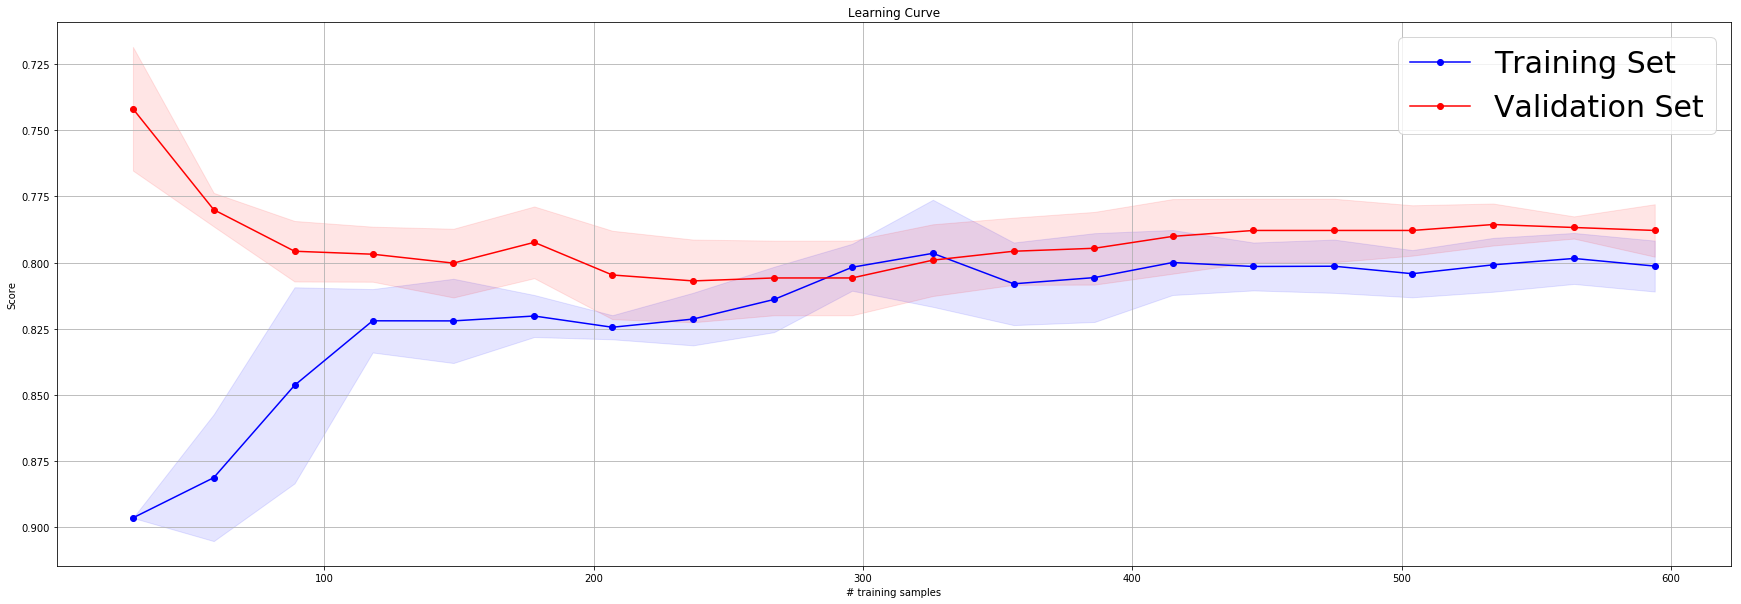

(0.7944677066405238, 0.033002216572467935)

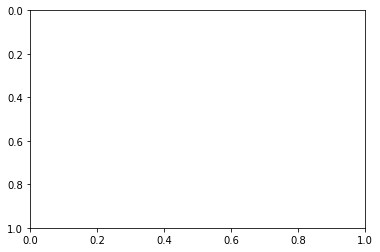

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure(figsize=(30,10))
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("# training samples")
        plt.ylabel("Score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Set')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Validation Set')
#         plt.legend(['训练集', '验证集'])
    
        plt.legend(loc="best", fontsize=(30))
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, "Learning Curve", X, y)


In [44]:
# 尝试用bagging方法进行融合
from sklearn.ensemble import BaggingRegressor
train_np = train_df.as_matrix()

y = train_np[:, 0]

X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C = 1.0, penalty='l2', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)

bagging_clf.fit(X, y)

predictions = bagging_clf.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)